In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pingparsing as pp
import json
import glob
from pathlib import Path
import requests
import ipinfo
import pickle

In [3]:
files = glob.glob("./homework01/URLS/*.txt")

In [4]:
def parse_results(file_paths):
    results = dict()
    parser = pp.PingParsing()
    for PATH in file_paths:
        url = Path(PATH).stem
        with open(PATH, "r") as f:
                content = f.read()
        if len(content) < 1:
            continue
        results[url] = {"info" : None, "replies" : None}
        _content = parser.parse(content)
        results[url]["info"] = _content.as_dict()
        results[url]["replies"] = _content.icmp_replies
        ip_start_index = content.find(' (') + 2
        ip_end_index = content.find(')')
        results[url]['ip'] = content[ip_start_index:ip_end_index]
    return results

In [5]:
results = parse_results(files)

In [6]:
list(results.keys())

['southalabama.edu',
 'gccaz.edu',
 'arizona.edu',
 'uark.edu',
 'uaccb.edu',
 'centralaz.edu',
 'anc.edu',
 'uat.edu',
 'atu.edu',
 'montevallo.edu',
 'uah.edu',
 'trenholmstate.edu',
 'maricopa.edu',
 'alaskacc.edu',
 'olaralex.com',
 'jsu.edu',
 'saumag.edu',
 'jbu.edu',
 'bryan.edu',
 'uams.edu',
 'samford.edu',
 'troy.edu',
 'pccua.edu',
 'nwscc.edu',
 'hsu.edu',
 'una.edu',
 'ozarks.edu',
 'npc.edu',
 'obu.edu',
 'ualr.edu',
 'escc.edu',
 'tuskegee.edu',
 'aum.edu',
 'alaska.edu',
 'gcu.edu',
 'seark.edu',
 'harding.edu',
 'mesacc.edu',
 'nau.edu',
 'huntingdon.edu',
 'southmountaincc.edu',
 'pima.edu',
 'riosalado.edu',
 'sebc.edu',
 'wbcoll.edu',
 'gadsdenstate.edu',
 'phoenix.edu',
 'snead.edu',
 'athens.edu',
 'calhoun.edu',
 'auburn.edu',
 'bsc.edu',
 'northark.edu',
 'cbc.edu',
 'lbwcc.edu',
 'hendrix.edu',
 'nwacc.edu',
 'prescott.edu',
 'yc.edu',
 'oakwood.edu',
 'ua.edu',
 'nwti.edu',
 'aamu.edu',
 'nacc.edu',
 'uaf.edu',
 'uab.edu',
 'azwestern.edu',
 'lyon.edu',
 'uca.

In [7]:
with open('geo_locations.pkl', 'rb') as _f:
    ip_to_location = pickle.load(_f)

In [8]:
import geopandas

In [9]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

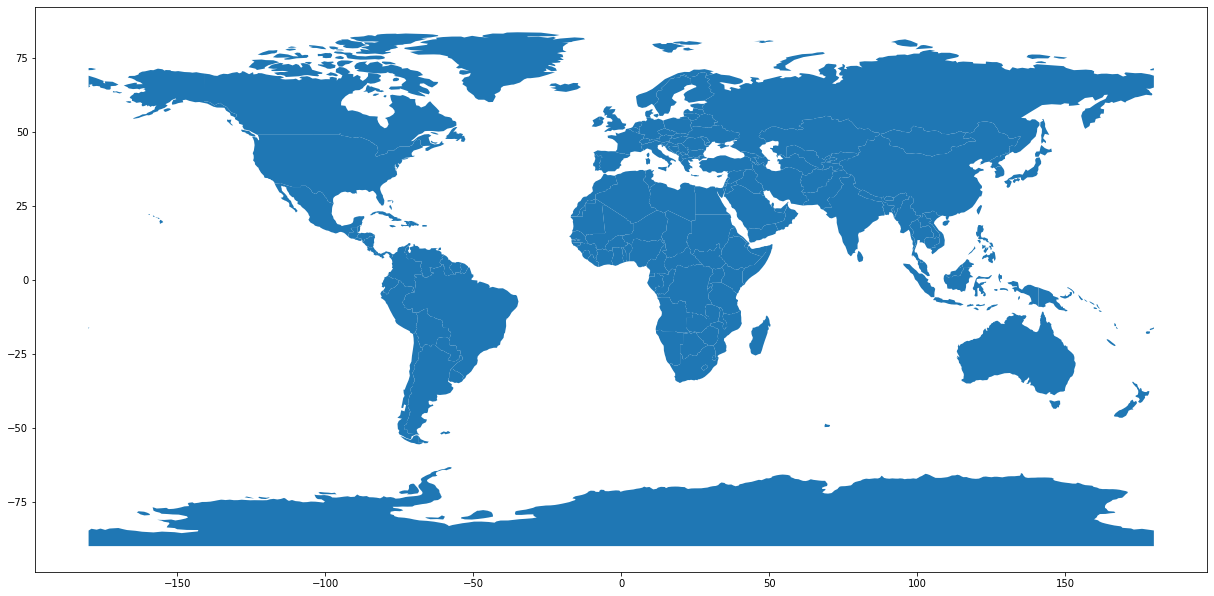

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(21, 14))
world.plot(ax = ax)

In [11]:
from shapely.geometry import Point

In [12]:
points = [Point(ip_to_location[ip][::-1]) for ip in ip_to_location.keys()]

In [13]:
locs = geopandas.GeoDataFrame(None, crs=world.crs, geometry=points)
locs['ip'] = list(ip_to_location.keys())

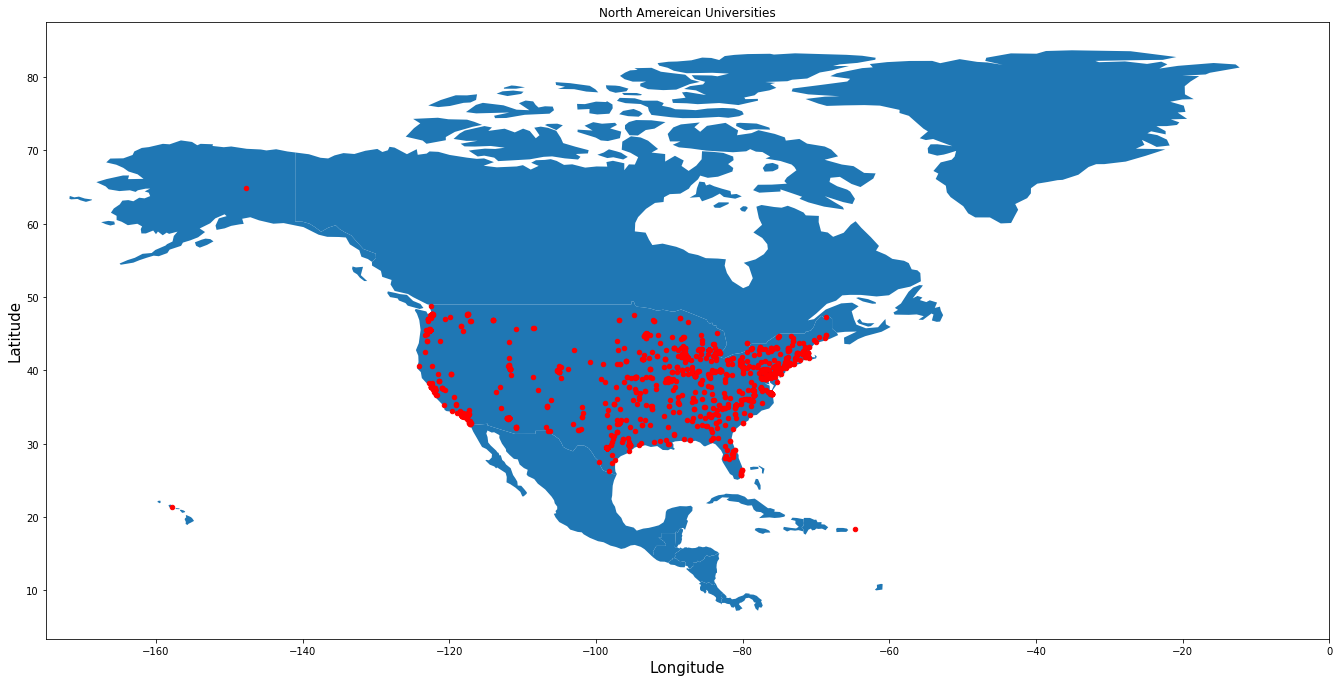

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(23, 16))
world[world.continent == 'North America'].plot(ax = ax)
locs.plot(ax = ax, markersize=20, label='IPs', color='red')
plt.ylabel('Latitude', size=15)
plt.xlabel('Longitude', size=15)
plt.xlim(-175, 0)
plt.title('North Amereican Universities')
plt.savefig('pinged-locations.png', dpi=100)

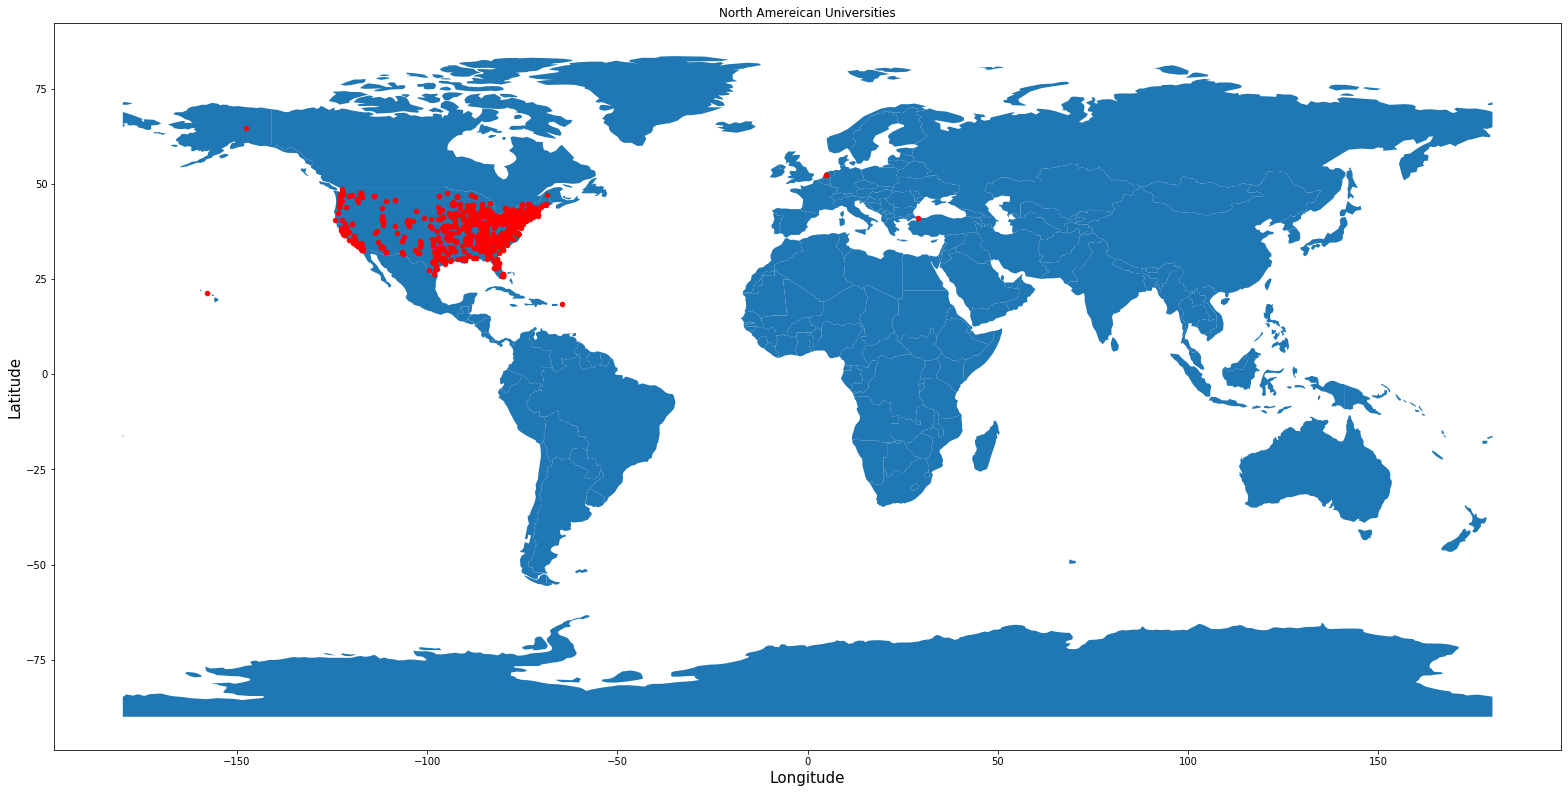

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(27, 19))
world.plot(ax = ax)
locs.plot(ax = ax, markersize=20, label='IPs', color='red')
plt.ylabel('Latitude', size=15)
plt.xlabel('Longitude', size=15)
plt.title('North Amereican Universities')
plt.savefig('pinged-locations-worldwide.png', dpi=100)

In [16]:
from geopy.distance import great_circle

In [17]:
current_loc = (47.4839, 19.0597)

In [18]:
ip_to_distances = dict()

for ip in ip_to_location.keys():
    loc = tuple(ip_to_location[ip])
    ip_to_distances[ip] = great_circle(current_loc, loc).meters / 1000.

In [19]:
ip_to_url = dict()

for url in results.keys():
    ip_to_url[results[url]['ip']] = url

In [20]:
# results['olaralex.com']['info']['rtt_avg']

In [21]:
avg_rtts = []
distances = []
ips = []
urls = []

for url in results.keys():
    avg_rtt = results[url]['info']['rtt_avg']
    print(url)
    print(avg_rtt)
    if avg_rtt != None:
        distance = ip_to_distances[results[url]['ip']]
        avg_rtts.append(avg_rtt)
        distances.append(distance)
        ips.append(ip)
        urls.append(url)
        
avg_rtts = np.array(avg_rtts)
distances = np.array(distances)
ips = np.array(ips)
urls = np.array(urls)

print(ips, urls, avg_rtts)

southalabama.edu
None
gccaz.edu
105.062
arizona.edu
None
uark.edu
None
uaccb.edu
None
centralaz.edu
16.537
anc.edu
None
uat.edu
154.503
atu.edu
108.438
montevallo.edu
None
uah.edu
None
trenholmstate.edu
103.334
maricopa.edu
105.07
alaskacc.edu
119.277
olaralex.com
14.278
jsu.edu
None
saumag.edu
146.582
jbu.edu
111.995
bryan.edu
154.185
uams.edu
None
samford.edu
None
troy.edu
None
pccua.edu
118.818
nwscc.edu
None
hsu.edu
131.359
una.edu
None
ozarks.edu
122.641
npc.edu
14.29
obu.edu
120.444
ualr.edu
None
escc.edu
129.34
tuskegee.edu
None
aum.edu
None
alaska.edu
None
gcu.edu
None
seark.edu
14.354
harding.edu
120.349
mesacc.edu
None
nau.edu
None
huntingdon.edu
14.259
southmountaincc.edu
105.036
pima.edu
None
riosalado.edu
None
sebc.edu
112.613
wbcoll.edu
135.234
gadsdenstate.edu
120.168
phoenix.edu
154.209
snead.edu
None
athens.edu
172.281
calhoun.edu
129.296
auburn.edu
None
bsc.edu
1.335
northark.edu
None
cbc.edu
112.874
lbwcc.edu
None
hendrix.edu
None
nwacc.edu
None
prescott.edu
165.957


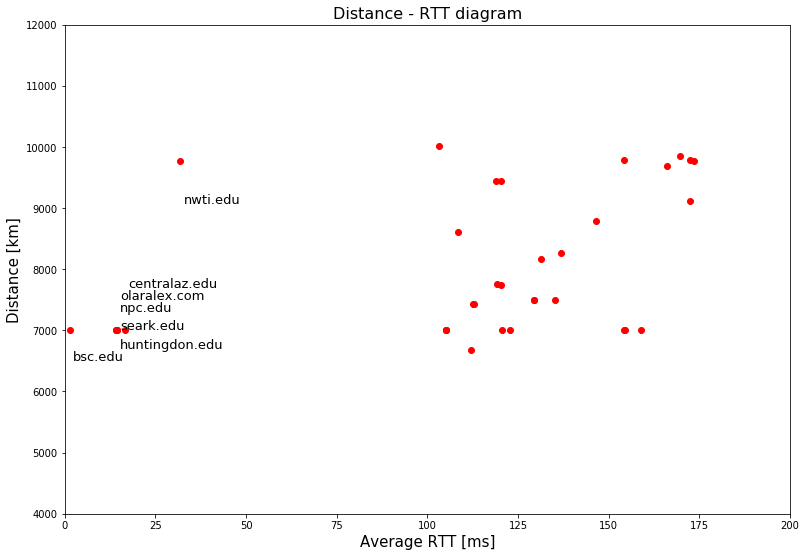

In [23]:
plt.figure(figsize=(13, 9))

plt.scatter(avg_rtts, distances, marker='o', label='Measurements', color='r')
plt.ylabel('Distance [km]', size=15)
plt.xlabel('Average RTT [ms]', size=15)
plt.title('Distance - RTT diagram', size=16)
plt.xlim(0, 200)
plt.ylim(4000, 12000)

inds = np.where(avg_rtts < 50)[0]
_x, _y = avg_rtts[inds], distances[inds]

for ind, (__x, __y) in enumerate(zip(_x, _y)):
    shifts = [-700, -500, -300, 0, 300, 500, 700]
    plt.text(__x + np.random.randint(1, high=2), __y - shifts[ind], s=urls[inds[ind]], size = 13)

plt.savefig('distance-rtt-diagram-outliers-annotated.png', dpi=70)